# Introducción al Aprendizaje Estadístico
## Trabajo Práctico final

**Alumnos**: Ariana Bardauil, Adrian, Gustavo

### Objetivo.
El presente trabajo tiene como finalidad la integración y aplicación de las técnicas estudiadas durante la materia
como así también la aplicación correcta de los algoritmos.
### Fecha de entrega.
Miércoles 12 de julio del 2023.

### Condiciones.
El trabajo debe ser grupal (mínimo 2 - máximo 3).

### Entregable.
1. Un análisis escrito con los requerimientos por parte.
2. Notebook con el código en Python de los análisis realizados.
3. Se entregará al correo jeremiasmorlandi@gmail.com con el asunto “TP Integrador” y los apellidos de los
integrantes.


# Consignas.
El trabajo será un informe estadístico de 3 segmentos que contenga la respuesta a los siguientes conceptos. Van analizar los
datos del conjunto de datos “Buenos Aires Airbnb Open Data”. (Link al Kaggle)

## PARTE I. Estadística descriptiva.



Las medidas de tendencia central (MTC) corresponden al conjunto de técnicas que nos dan información sobre la centralidad de los datos. Estas técnicas nos dan una medida resumen de todo el conjunto de datos. Lo primero que vamos a realizar es cargar la base y explorar las variables 

In [20]:
#Primero importamos las librerías más importantes.
import pandas as pd 
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

#La vamos a procesar con la función para leer csv en Pandas.
data = pd.read_csv('Buenos_Aires_AIRBNB.csv')

#observamos las variables
data.head()


id                                 name  host_id host_name  \
0   7270  ¡¡Great Loft in Palermo Hollywood!!    18822      Toni   
1  11508   Amazing Luxurious Apt-Palermo Soho    42762   Candela   
2  12463  Room in Recoleta - awesome location    48799      Matt   
3  13095   Standard Room at Palermo Viejo B&B    50994     Ariel   
4  13096   Standard Room in Palermo Viejo B&B    50994     Ariel   

  neighbourhood  latitude  longitude        room_type  price  minimum_nights  \
0       Palermo -34.58241  -58.43382  Entire home/apt   2033              20   
1       Palermo -34.58225  -58.42460  Entire home/apt   3588               2   
2      Recoleta -34.59761  -58.39468     Private room   1435               1   
3       Palermo -34.59382  -58.42994     Private room   2691               1   
4       Palermo -34.59398  -58.42853     Private room   2691               1   

   number_of_reviews last_review  reviews_per_month  \
0                 14  30-04-2018               0.15   
1                 25  13-08-2019               0.28   
2                 20  11-12-2017               0.17   
3                  1  18-12-2018               0.09   
4                  0         NaN                NaN   

   calculated_host_listings_count  availability_365  
0                               1               363  
1                               1               281  
2                               1               365  
3                               7               360  
4                               7               360

### ¿Qué columnas tiene?¿Qué tipo de columnas son?



| **Variable**                   | **Descripción**                              |
|--------------------------------|----------------------------------------------|
| id                             | ID único del alojamiento                     |
| name                           | Nombre del alojamiento                       |
| host_id                        | ID del anfitrión                             |
| host_name                      | Nombre del anfitrión                         |
| neighbourhood                  | Barrio o vecindario                          |
| latitude                       | Latitud geográfica                           |
| longitude                      | Longitud geográfica                          |
| room_type                      | Tipo de habitación                           |
| price                          | Precio del alojamiento                       |
| minimum_nights                 | Estadía mínima en noches                     |
| number_of_reviews              | Número de reseñas                            |
| last_review                    | Fecha de la última reseña                    |
| reviews_per_month              | Promedio de reseñas por mes                  |
| calculated_host_listings_count | Cantidad de alojamientos del mismo anfitrión |
| availability_365               | Número de días de disponibilidad en el año   |

In [21]:
data.shape

#Filas
print(f'Cantidad de filas: {data.shape[0]}\n')

#Columnas
print(f'Cantidad de columnas: {data.shape[1]}')

Cantidad de filas: 22877

Cantidad de columnas: 15


La base de AIRBNB tiene 22.877 filas y 15 columnas. Este conjunto de datos incluye toda la información sobre hosts, disponibilidad geográfica, de el aplicativo AIRBNB. **Airbnb** es una compañía que ofrece una plataforma digital dedicada a la oferta de alojamientos a particulares y turísticos (alquiler vacacional) mediante la cual los anfitriones pueden publicitar y contratar el arriendo de sus propiedades con sus huéspedes; anfitriones y huéspedes pueden valorarse mutuamente, como referencia para futuros usuarios

In [22]:
data.describe()

id       host_id      latitude     longitude          price  \
count  2.287700e+04  2.287700e+04  22877.000000  22877.000000   22877.000000   
mean   2.487670e+07  9.739731e+07    -34.592534    -58.416364    3214.630196   
std    1.191191e+07  9.274044e+07      0.018304      0.029937   12364.429880   
min    7.270000e+03  2.616000e+03    -34.688950    -58.530200     120.000000   
25%    1.631899e+07  1.363528e+07    -34.603400    -58.435630    1196.000000   
50%    2.856388e+07  6.212518e+07    -34.591830    -58.415950    1973.000000   
75%    3.454449e+07  1.713546e+08    -34.581970    -58.392220    2990.000000   
max    4.035243e+07  3.118884e+08    -34.532720    -58.354880  597865.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    22877.000000       22877.000000       16432.000000   
mean         5.653233          15.482974           1.266434   
std         21.513176          31.268565           1.440429   
min          1.000000           0.000000           0.010000   
25%          1.000000           0.000000           0.250000   
50%          3.000000           4.000000           0.760000   
75%          4.000000          16.000000           1.810000   
max       1125.000000         600.000000          37.580000   

       calculated_host_listings_count  availability_365  
count                    22877.000000      22877.000000  
mean                         6.296062        202.064912  
std                         14.748998        134.161675  
min                          1.000000          0.000000  
25%                          1.000000         83.000000  
50%                          1.000000        180.000000  
75%                          4.000000        343.000000  
max                        105.000000        365.000000

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22877 entries, 0 to 22876
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              22877 non-null  int64  
 1   name                            22867 non-null  object 
 2   host_id                         22877 non-null  int64  
 3   host_name                       22854 non-null  object 
 4   neighbourhood                   22877 non-null  object 
 5   latitude                        22877 non-null  float64
 6   longitude                       22877 non-null  float64
 7   room_type                       22877 non-null  object 
 8   price                           22877 non-null  int64  
 9   minimum_nights                  22877 non-null  int64  
 10  number_of_reviews               22877 non-null  int64  
 11  last_review                     16432 non-null  object 
 12  reviews_per_month               

In [24]:


def analisis_columna(data):
    rows = []
    for columna in data:
        cuenta_notnull = data[columna].notnull().sum()
        ejemplo_valores = data[columna].unique().tolist()[:5]
        tipo_columna = type(data[columna][0])
        rows.append([columna, cuenta_notnull, data.shape[0], ejemplo_valores, tipo_columna])

    headers = ["Columna", "Cuenta notnull", "Total filas", "Ejemplo de valores", "Tipo de columna"]
    table = tabulate(rows, headers, tablefmt="fancy_grid")
    print(table)

print(analisis_columna(data))

╒════════════════════════════════╤══════════════════╤═══════════════╤══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤═════════════════════════╕
│ Columna                        │   Cuenta notnull │   Total filas │ Ejemplo de valores                                                                                                                                                                               │ Tipo de columna         │
╞════════════════════════════════╪══════════════════╪═══════════════╪══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╪═════════════════════════╡
│ id                             │            22877 │         22877 │ [7270, 11508, 12463, 13095, 13096]                       

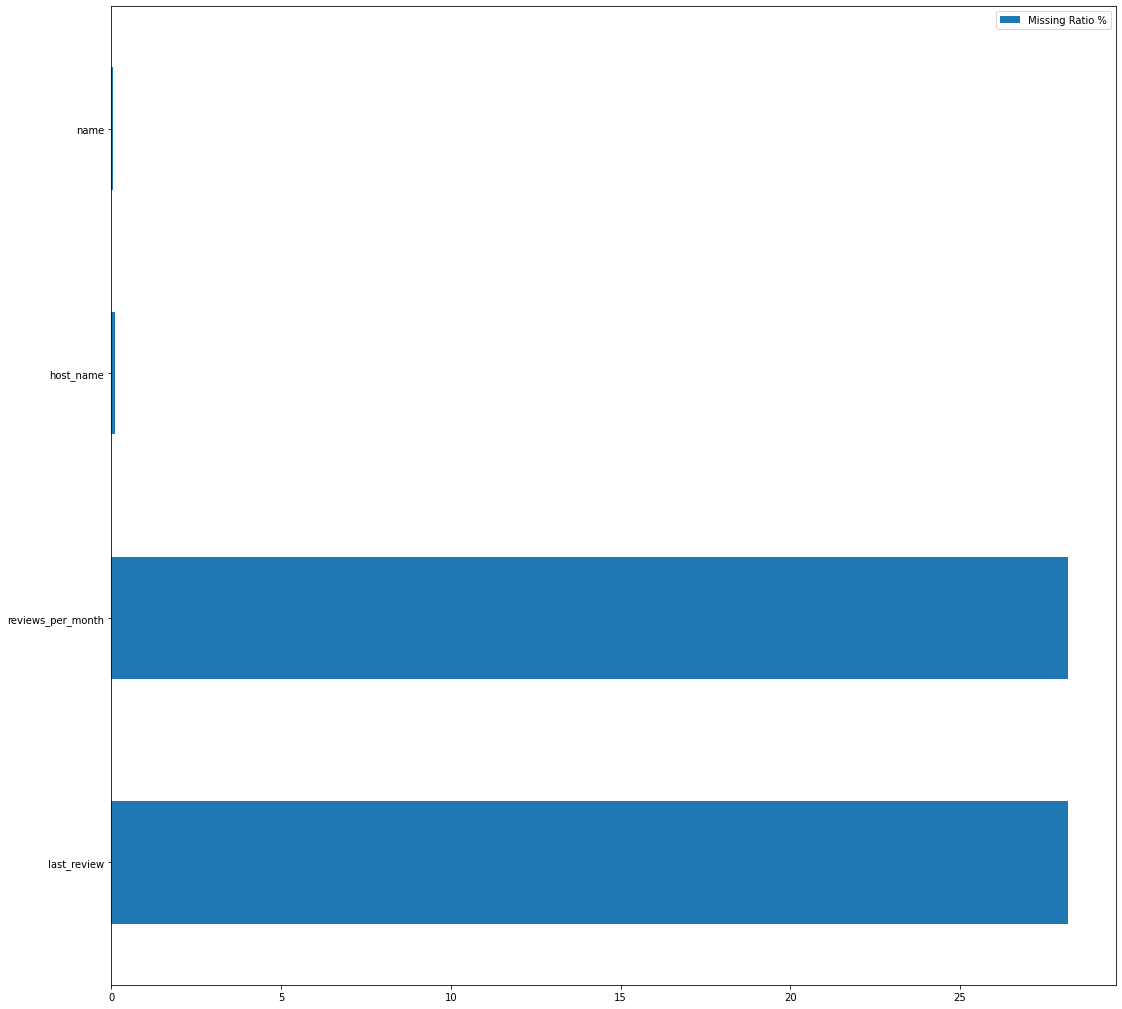

In [25]:
plot_width, plot_height = (18,18)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)

def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')
        
        
plot_nas(data)

Vemos que **last_review** y **reviews_per_month** tienen valores nulos

Se puede presuponer que ambas columnas poseen valores nulos porque existen hosts sin reviews.Vamos a asignarle el valor "0" a ambas columnas

In [28]:
data['last_review'].fillna(0,inplace=True)
data['reviews_per_month'].fillna(0,inplace=True)

#eliminamos las columnas que no nos interesan para el análisis
data = data.drop(columns=['name','host_name'])

#vemos la distribución de NULLs ahora

data.isnull().sum()


id                                0
host_id                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


### Análisis y aplicación de Medidas de Tendencia Central.


In [30]:
def medidas_tendencia_central(data):
    numeric_columns = data.select_dtypes(include='number').columns
    rows = []
    
    for columna in numeric_columns:
        media = data[columna].mean()
        mediana = data[columna].median()
        moda = data[columna].mode().tolist()
        rows.append([columna, media, mediana, moda])

    headers = ["Variable", "Media", "Mediana", "Moda"]
    table = tabulate(rows, headers, tablefmt="fancy_grid")
    print(table)

medidas_tendencia_central(data)

╒════════════════════════════════╤════════════════╤════════════════╤════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════

Vamos a analizar las variables `price`, `minimun_nihts`, `number_of_reviews`, `reviews_per_months`,`calculated_host_listings_count`, y `availability_365`

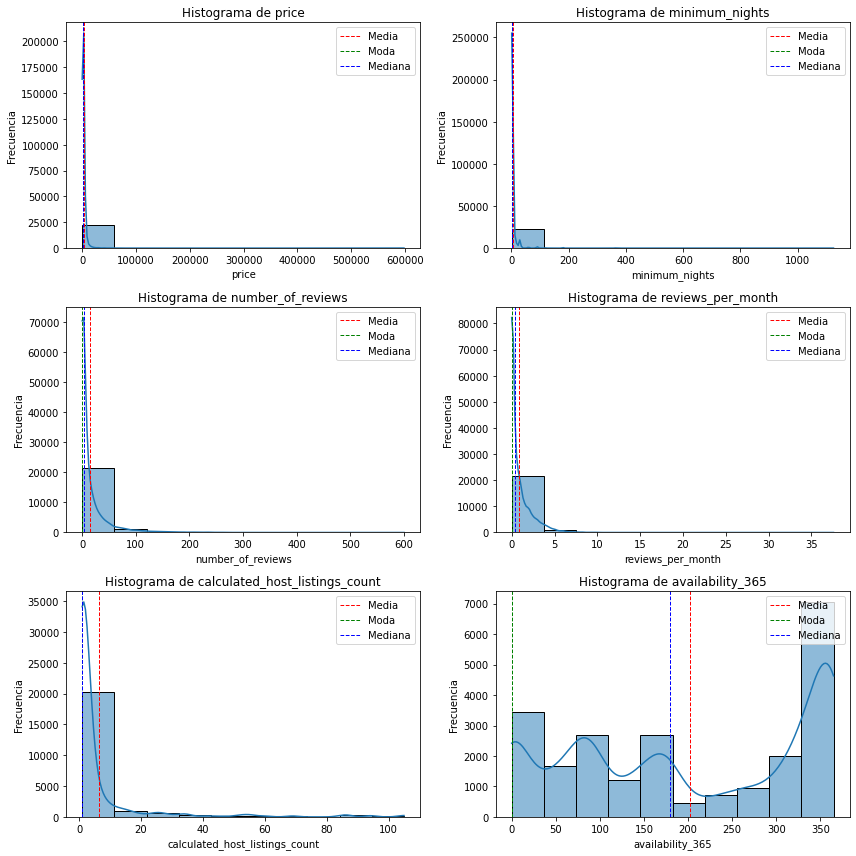

In [36]:
import seaborn as sns

variables = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

fig, axes = plt.subplots(3, 2, figsize=(12, 12))

for i, variable in enumerate(variables):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    # Calcular la media, moda y mediana
    media = data[variable].mean()
    moda = data[variable].mode().values[0]
    mediana = data[variable].median()
    
    # Crear el histograma
    sns.histplot(data=data, x=variable, bins=10, kde=True, ax=ax)
    
    # Agregar líneas verticales para la media, moda y mediana
    ax.axvline(media, color='r', linestyle='dashed', linewidth=1, label='Media')
    ax.axvline(moda, color='g', linestyle='dashed', linewidth=1, label='Moda')
    ax.axvline(mediana, color='b', linestyle='dashed', linewidth=1, label='Mediana')
    
    # Configurar etiquetas y título del gráfico
    ax.set_xlabel(variable)
    ax.set_ylabel('Frecuencia')
    ax.set_title(f'Histograma de {variable}')
    
    # Mostrar la leyenda
    ax.legend()

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

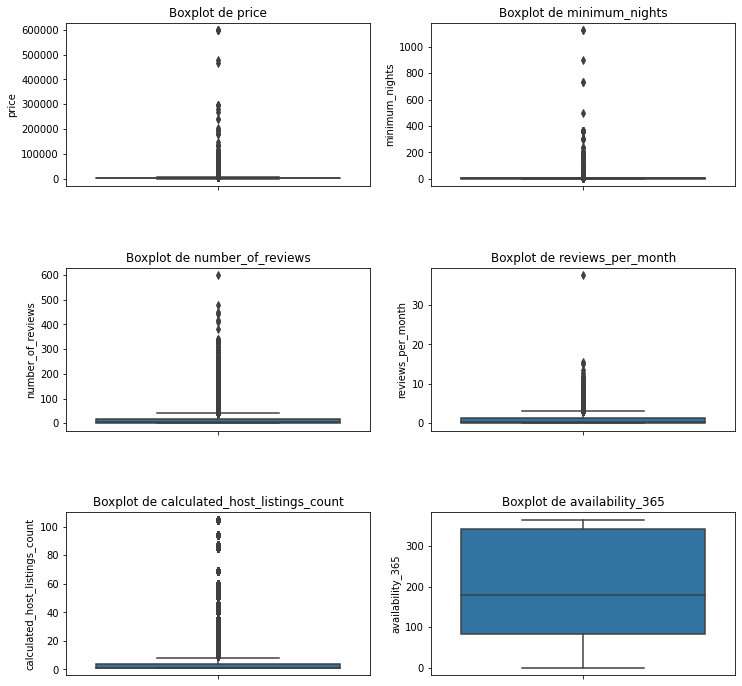

In [37]:

fig, axes = plt.subplots(3, 2, figsize=(12, 12))

for i, variable in enumerate(variables):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    # Crear el boxplot
    sns.boxplot(data=data, y=variable, ax=ax)
    
    # Configurar etiquetas y título del gráfico
    ax.set_ylabel(variable)
    ax.set_title(f'Boxplot de {variable}')
    
    # Ajustar el espacio entre los subplots
    plt.subplots_adjust(hspace=0.5)
    
# Mostrar los gráficos
plt.show()

Se observa que ....

*  Análisis y aplicación de Medidas de Dispersión.
*  Análisis de covarianza entre las variables.

*Se sugiere incluir visualizaciones que acompañen el informe.*

### PARTE II. Modelado supervisado.
Se les solicita generar dos modelos de aprendizaje supervisado.
* Modelo que prediga el precio.
* Modelo que prediga el barrio.
* Seleccionar variables y aplicar modelos de aprendizaje supervisado de acuerdo a la
combinación de variables encontradas.
* Incluir las métricas de evaluación y fundamentos de por qué se seleccionaron las variables
predictoras.


### PARTE III. Modelado no supervisado.
Se les solicita generar un modelo de agrupamiento.
* Implementar el modelo de acuerdo a las variables de agrupamiento o predictoras que consideren
mejor.
* Evaluar cuál es el mejor número de clusters para agrupar el conjunto de dato